In [1]:
# pip install mne

In [64]:

import os
import numpy as np
import mne
from mne.channels import compute_native_head_t, read_custom_montage
from mne.viz import plot_alignment
from scipy import signal

# sample_data_folder = mne.datasets.sample.data_path()

In [65]:
# DATA LOAD

In [66]:
raw = mne.io.read_raw_edf("C:/Users/johnny0614/OneDrive/20년1학기/BCI/group1/P2/p2_lev1_lofi_M_raw.edf",preload=True)
loc = mne.channels.read_custom_montage("C:/Users/johnny0614/OneDrive/20년1학기/BCI/group1/DSI_channelLocs.locs") 
mne.set_log_level("WARNING")

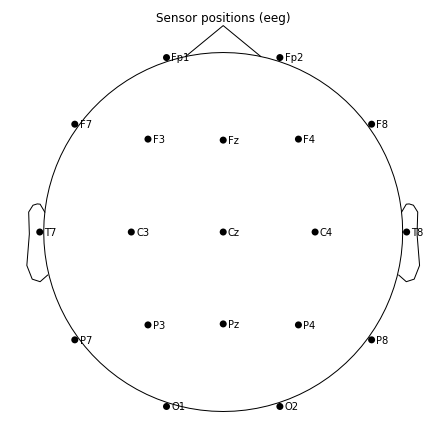

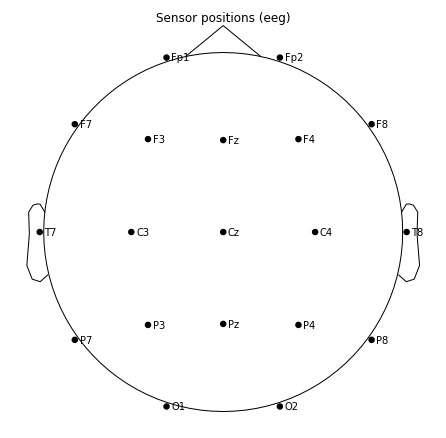

In [67]:
loc.plot() # checking the loc we use

In [68]:
# loc.ch_names

In [69]:
print(raw)
print(raw.info)

<RawEDF | p2_lev1_lofi_M_raw.edf, 22 x 39000 (130.0 s), ~6.6 MB, data loaded>
<Info | 7 non-empty values
 bads: []
 ch_names: Fp1 - Vref, Fp2 - Vref, F7 - Vref, F3 - Vref, Fz - Vref, F4 - ...
 chs: 21 EEG, 1 STIM
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 150.0 Hz
 meas_date: 2020-05-31 15:39:15 UTC
 nchan: 22
 projs: []
 sfreq: 300.0 Hz
>


In [70]:
raw.info['bads']

[]

In [71]:
channels = raw.ch_names
print(channels[0:19])
change_ch = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'O2']
print(loc.ch_names)

['Fp1 - Vref', 'Fp2 - Vref', 'F7 - Vref', 'F3 - Vref', 'Fz - Vref', 'F4 - Vref', 'F8 - Vref', 'T3 - Vref', 'C3 - Vref', 'Cz - Vref', 'C4 - Vref', 'T4 - Vref', 'T5 - Vref', 'P3 - Vref', 'Pz - Vref', 'P4 - Vref', 'T6 - Vref', 'O1 - Vref', 'O2 - Vref']
['C3', 'C4', 'Cz', 'F3', 'F4', 'F7', 'F8', 'Fp1', 'Fp2', 'Fz', 'O1', 'O2', 'P3', 'P4', 'P7', 'P8', 'Pz', 'T7', 'T8']


In [72]:
# data = .get_data()

In [73]:
chns = raw.info["ch_names"][0:19]
print(chns)

raw1 = raw.copy().pick_channels(chns) # exclude the stimulus chn
raw1.info

['Fp1 - Vref', 'Fp2 - Vref', 'F7 - Vref', 'F3 - Vref', 'Fz - Vref', 'F4 - Vref', 'F8 - Vref', 'T3 - Vref', 'C3 - Vref', 'Cz - Vref', 'C4 - Vref', 'T4 - Vref', 'T5 - Vref', 'P3 - Vref', 'Pz - Vref', 'P4 - Vref', 'T6 - Vref', 'O1 - Vref', 'O2 - Vref']


<Info | 7 non-empty values
 bads: []
 ch_names: Fp1 - Vref, Fp2 - Vref, F7 - Vref, F3 - Vref, Fz - Vref, F4 - ...
 chs: 19 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 150.0 Hz
 meas_date: 2020-05-31 15:39:15 UTC
 nchan: 19
 projs: []
 sfreq: 300.0 Hz
>

In [74]:
for i,k in zip(chns, change_ch) :
    mne.channels.rename_channels(raw1.info, {str(i):str(k)} ) # change the ch names to match the loc information

In [75]:
raw1.info

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, T7, C3, Cz, C4, T8, P7, P3, Pz, ...
 chs: 19 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 150.0 Hz
 meas_date: 2020-05-31 15:39:15 UTC
 nchan: 19
 projs: []
 sfreq: 300.0 Hz
>

In [76]:
print(raw1.info.ch_names)
print(loc.ch_names)

['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'O2']
['C3', 'C4', 'Cz', 'F3', 'F4', 'F7', 'F8', 'Fp1', 'Fp2', 'Fz', 'O1', 'O2', 'P3', 'P4', 'P7', 'P8', 'Pz', 'T7', 'T8']


In [77]:
raw1.set_montage(loc)
raw1.info
raw1.info['dig'] # check fot loc info injected 

[<DigPoint |     EEG #1 : (-68.4, 0.0, 65.9) mm     : head frame>,
 <DigPoint |     EEG #2 : (68.4, 0.0, 65.9) mm      : head frame>,
 <DigPoint |     EEG #3 : (0.0, 0.0, 95.0) mm       : head frame>,
 <DigPoint |     EEG #4 : (-51.7, 63.9, 47.6) mm    : head frame>,
 <DigPoint |     EEG #5 : (51.7, 63.9, 47.6) mm     : head frame>,
 <DigPoint |     EEG #6 : (-76.8, 55.8, -3.3) mm    : head frame>,
 <DigPoint |     EEG #7 : (76.8, 55.8, -3.3) mm     : head frame>,
 <DigPoint |     EEG #8 : (-29.3, 90.3, -3.3) mm    : head frame>,
 <DigPoint |     EEG #9 : (29.3, 90.3, -3.3) mm     : head frame>,
 <DigPoint |    EEG #10 : (0.0, 68.4, 65.9) mm      : head frame>,
 <DigPoint |    EEG #11 : (-29.3, -90.3, -3.3) mm   : head frame>,
 <DigPoint |    EEG #12 : (29.3, -90.3, -3.3) mm    : head frame>,
 <DigPoint |    EEG #13 : (-51.7, -63.9, 47.6) mm   : head frame>,
 <DigPoint |    EEG #14 : (51.7, -63.9, 47.6) mm    : head frame>,
 <DigPoint |    EEG #15 : (-76.8, -55.8, -3.3) mm   : head fra

In [78]:
pick_feats = ['Fp1 - Vref', 'Fp2 - Vref', 'F7 - Vref', 'F3 - Vref', 
         'Fz - Vref', 'F4 - Vref', 'F8 - Vref', 'T3 - Vref', 
         'C3 - Vref', 'Cz - Vref', 'C4 - Vref', 'T4 - Vref', 
         'P3 - Vref', 'Pz - Vref', 'P4 - Vref'] 
         
# exclude bads chans though plotting in below process

In [79]:
# raw1.plot(lowpass=20, n_channels=21, highpass=1 ,duration=100)

In [80]:
# bads = ['P7', 'P8', 'O1', 'O2'] # Can identify bad(noisy) channels

In [81]:
# # bads = ['P7', 'P8', 'O1', 'O2'] # Can identify bad(noisy) channels
# raw1.info['bads']=bads
# raw1.info

In [82]:
# raw1.plot(block=True, lowpass=100, n_channels=21 ,scalings='auto') 
# Can check the bad chns append or not

In [83]:
# picks = mne.pick_types(raw1.info, exclude='bads')

In [84]:
raw1.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, T7, C3, Cz, C4, T8, P7, P3, Pz, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 19 items (19 EEG)
 highpass: 0.0 Hz
 lowpass: 150.0 Hz
 meas_date: 2020-05-31 15:39:15 UTC
 nchan: 19
 projs: []
 sfreq: 300.0 Hz
>

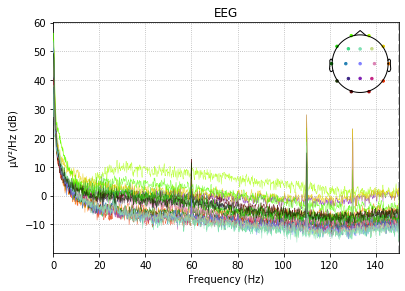

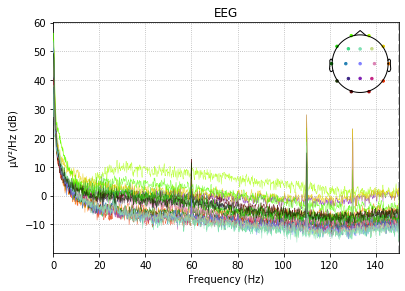

In [85]:
raw1.plot_psd()

In [86]:
# pick_raw.plot_psd()

In [87]:
# raw.info['bads']

In [88]:
# Line Noise Removal (Notch Filter)

In [89]:
np.arange(60,185,60)

array([ 60, 120, 180])

In [90]:
raw_nf = raw1.copy().notch_filter(np.arange(60,180,60)) # Notch filtering to remove 60 hz and its multiples

In [91]:
# pick_raw_nf = pick_raw.copy().notch_filter(np.arange(60,180,60)) # Notch filtering to remove 60 hz and its multiples

In [92]:
# raw_nf.plot(n_channels=21, highpass=1, lowpass=10 ,duration=120,remove_dc=True)

In [93]:
# pick_raw_nf.plot(block=True, lowpass=13 ,scalings='auto')

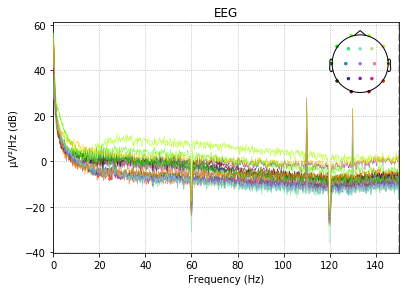

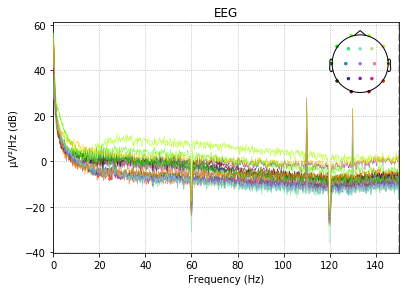

In [94]:
raw_nf.plot_psd()

In [95]:
# pick_raw_nf.plot_psd()

In [96]:
# Band Pass Filter

In [97]:
raw_bp = raw_nf.copy().filter(1, 100, n_jobs=1) # Bandpass filter 1 to 100 hz
raw_bp.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, T7, C3, Cz, C4, T8, P7, P3, Pz, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 19 items (19 EEG)
 highpass: 1.0 Hz
 lowpass: 100.0 Hz
 meas_date: 2020-05-31 15:39:15 UTC
 nchan: 19
 projs: []
 sfreq: 300.0 Hz
>

In [98]:
# pick_raw_bp = pick_raw_nf.copy().filter(1,100, n_jobs=1) # Bandpass filter 1 to 100 hz
# pick_raw_bp.info

In [99]:
# raw1.info
# raw_nf.info
# raw_bp.info

In [100]:
# pick_raw1.info
# pick_raw_nf.info
# pick_raw_bp.info

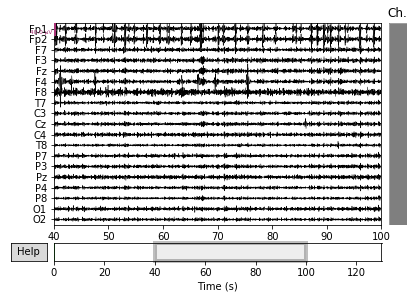

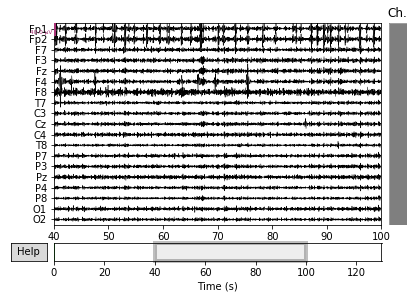

In [101]:
raw_bp.plot(duration=60, highpass=4, lowpass=13, start=40)

<Info | 9 non-empty values
 bads: 4 items (F8, F7, O1, O2)
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, T7, C3, Cz, C4, T8, P7, P3, Pz, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 19 items (19 EEG)
 highpass: 1.0 Hz
 lowpass: 100.0 Hz
 meas_date: 2020-05-31 15:39:15 UTC
 nchan: 19
 projs: []
 sfreq: 300.0 Hz
>


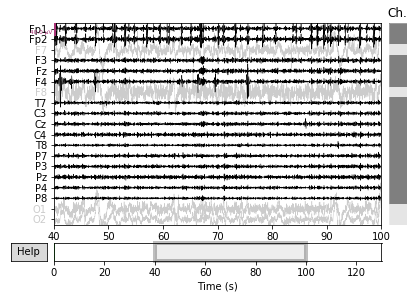

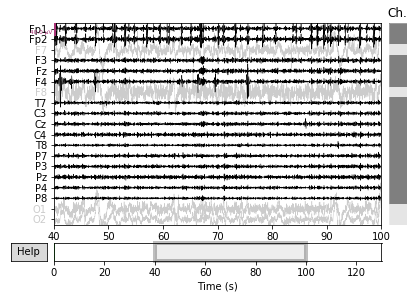

In [130]:
bads = ['F8', 'F7', 'O1', 'O2'] # Can identify bad(noisy) channels
raw_bcr = raw_bp.copy()
raw_bcr.info['bads']=bads
print(raw_bcr.info)

raw_bcr.plot(duration=60, highpass=4, lowpass=13, start=40)

In [131]:
# pick_raw_bp.plot(block=True, lowpass=13, n_channels=21 ,scalings='auto')

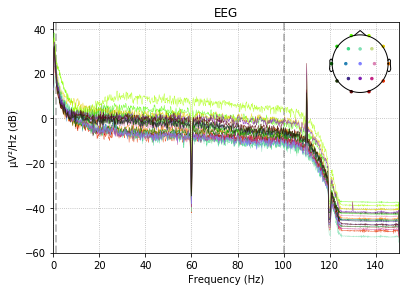

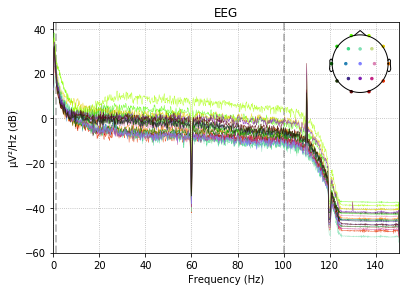

In [132]:
raw_bp.plot_psd()

In [133]:
# pick_raw_bp.plot_psd()

In [134]:
## Bad Channel Rejection & Interpolate

In [135]:
raw_intp = raw_bcr.copy()
raw_intp = raw_intp.interpolate_bads(reset_bads=False) # interpolate bad chns

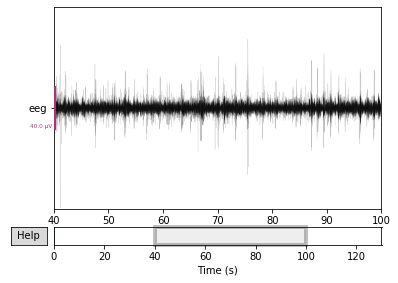

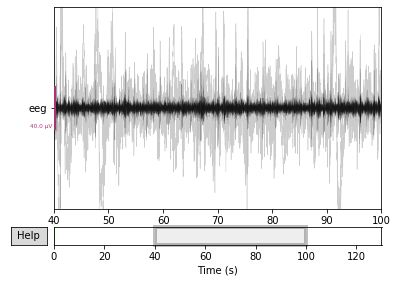

In [136]:
eeg_data = raw1.copy()
eeg_data_interp = raw_intp.copy()

for title, data in zip(['orig.', 'interp.'], [eeg_data, eeg_data_interp]):
    fig = data.plot(butterfly=True, color='#00000022',duration=60, start=40, lowpass=13, highpass=4)
    fig.subplots_adjust(top=1)
    fig.suptitle(title, size='xx-large', weight='bold')

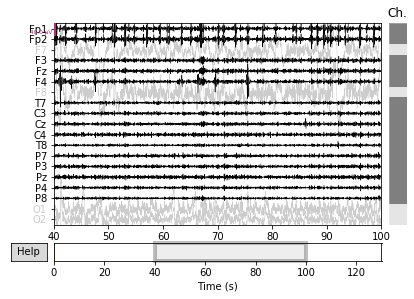

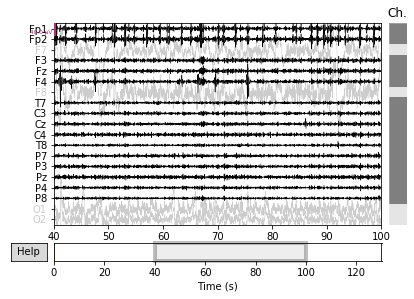

In [137]:
raw_intp.plot(duration=60, start=40, highpass=4, lowpass=13)

In [138]:
raw_intp.info

<Info | 9 non-empty values
 bads: 4 items (F8, F7, O1, O2)
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, T7, C3, Cz, C4, T8, P7, P3, Pz, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 19 items (19 EEG)
 highpass: 1.0 Hz
 lowpass: 100.0 Hz
 meas_date: 2020-05-31 15:39:15 UTC
 nchan: 19
 projs: []
 sfreq: 300.0 Hz
>

In [139]:
## Re-Referencing

In [140]:
raw_rf = raw_intp.copy()
raw_rf = raw_rf.set_eeg_reference(ref_channels='average')

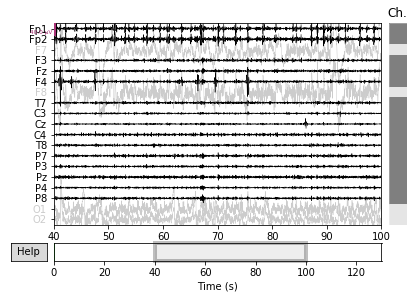

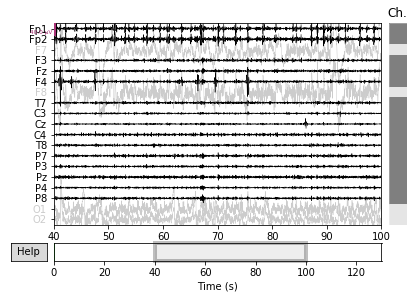

In [141]:
raw_rf.plot(duration=60, start=40, highpass=4, lowpass=13)

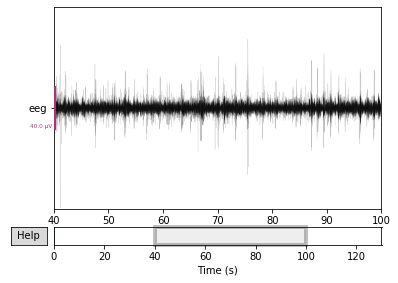

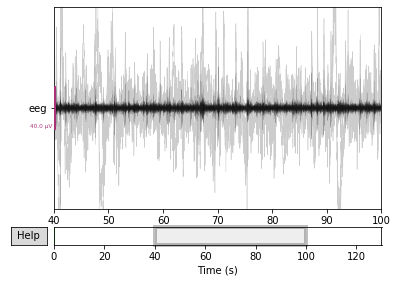

In [142]:
eeg_data1 = raw1.copy()
eeg_data_interp1 = raw_rf.copy()

for title, data in zip(['orig.', 'interp.'], [eeg_data1, eeg_data_interp1]):
    fig = data.plot(butterfly=True, color='#00000022', duration=60, start=40, highpass=4, lowpass=13)
    fig.subplots_adjust(top=1)
    fig.suptitle(title, size='xx-large', weight='bold')

In [143]:
## Artefact removal

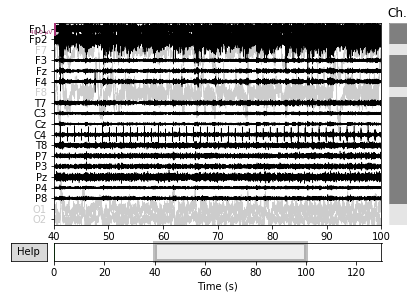

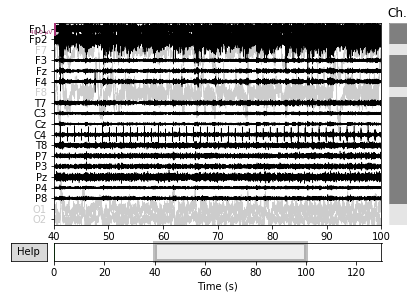

In [144]:
raw_rf.plot(duration=60, start=40, n_channels=19, remove_dc=False, highpass=30, lowpass=100)

In [145]:
# regexp = ['Fz','F3', 'F4', 'Cz', 'C3', 'C4' 'T7', 'T8', 'P7', 'P8', 'Pz', 'P3', 'P4']
# artifact_picks = mne.pick_channels_regexp(raw_rf.ch_names, regexp)

In [146]:
filt_low = raw_rf.copy()
filt_low.load_data().filter(l_freq=1., h_freq=None)

<RawEDF | p2_lev1_lofi_M_raw.edf, 19 x 39000 (130.0 s), ~5.7 MB, data loaded>

In [147]:
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,
                               corrmap)

ica = ICA(n_components=13, random_state=97)
ica.fit(filt_low)

<ICA  |  raw data decomposition, fit (fastica): 39000 samples, 13 components, channels used: "eeg">

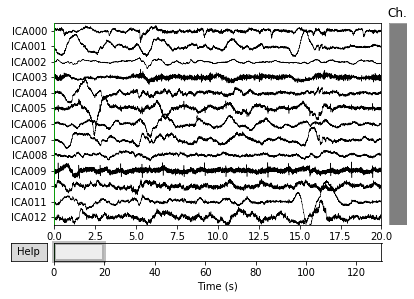

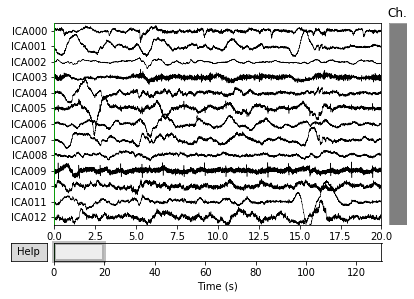

In [148]:
raw.load_data()
ica.plot_sources(raw_rf)

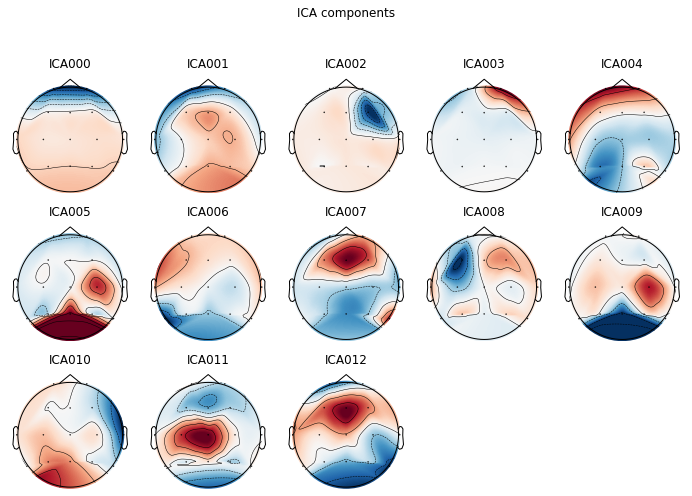

[<Figure size 702x508.68 with 13 Axes>]

In [149]:
ica.plot_components()

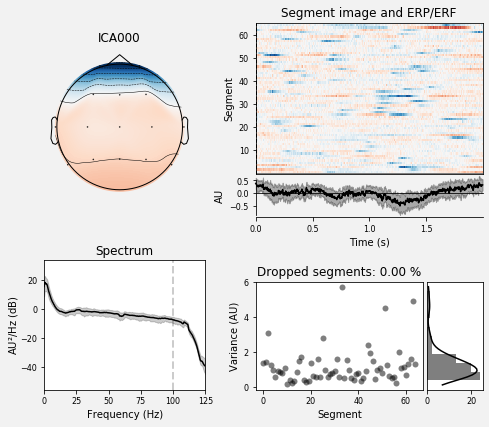

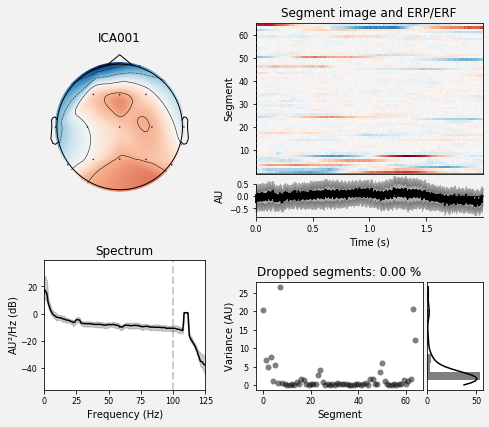

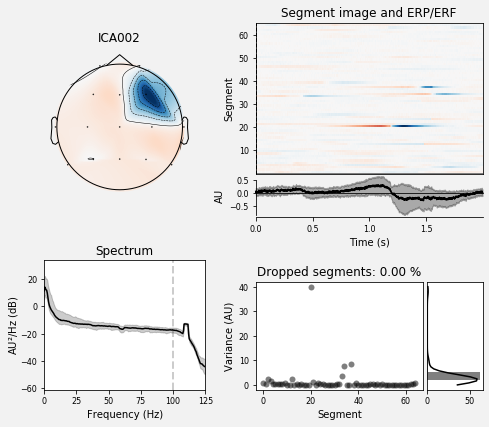

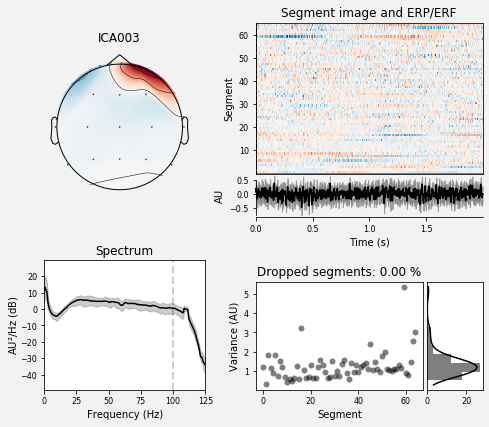

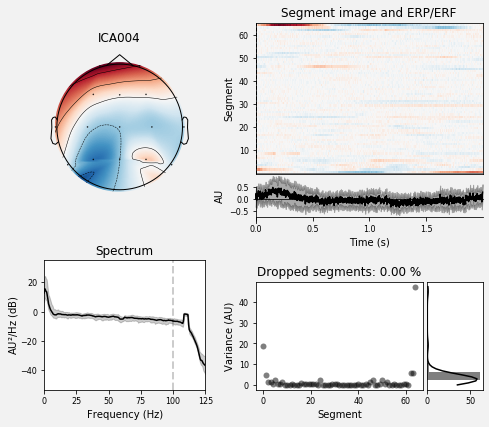

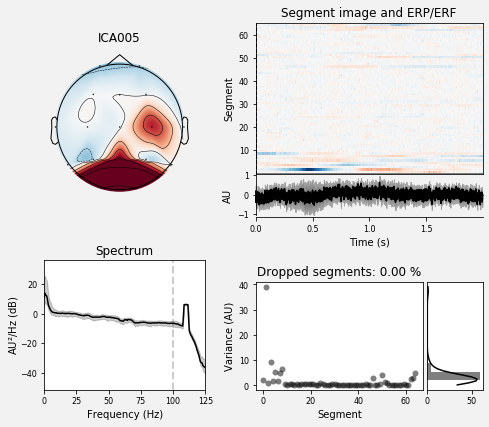

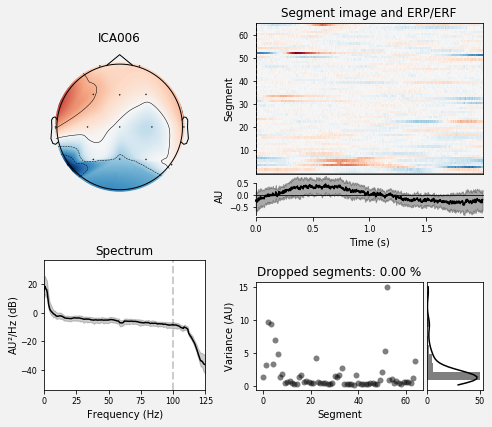

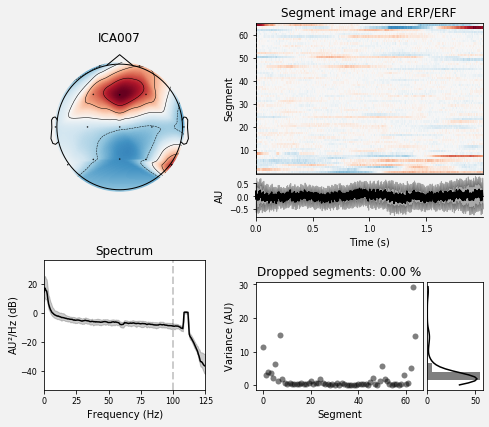

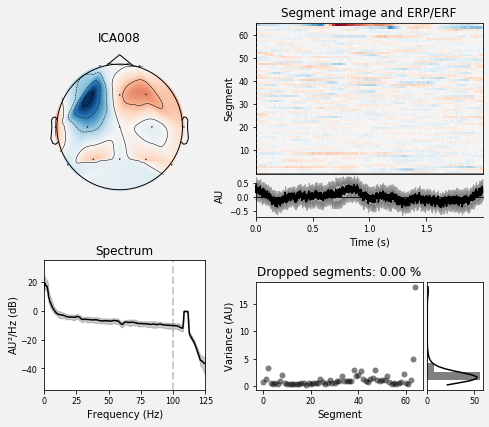

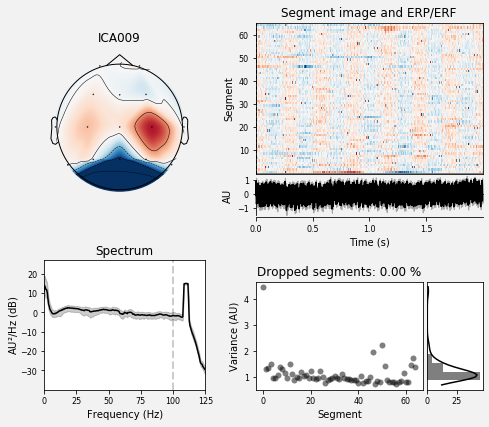

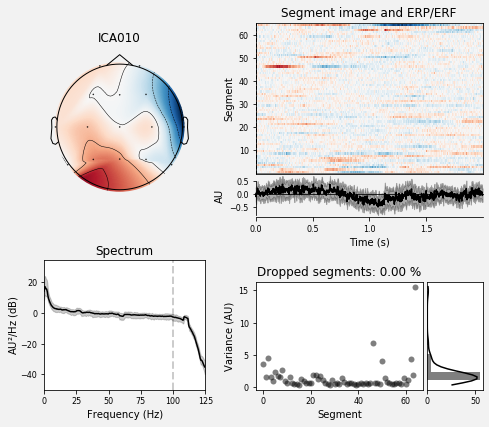

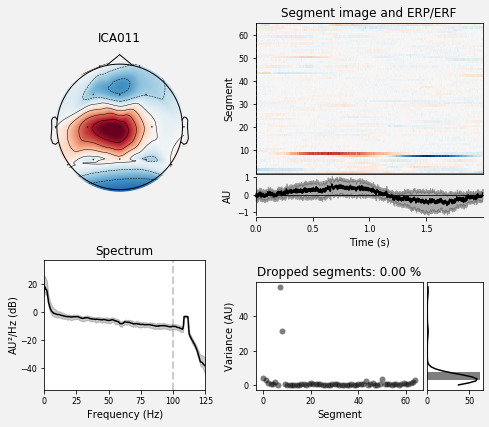

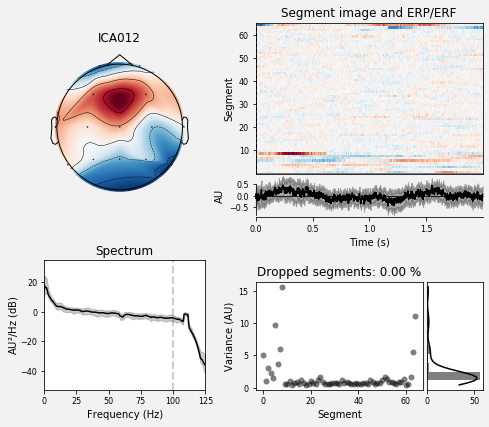

[<Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>]

In [150]:
ica.plot_properties(raw_rf, picks=[0,1,2,3,4,5,6,7,8,9,10,11,12])

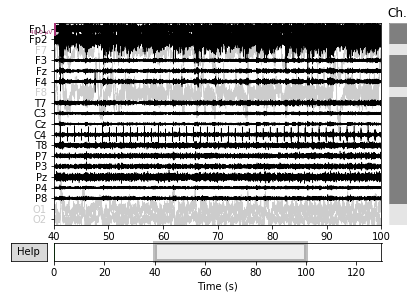

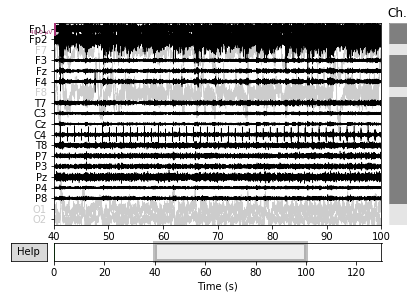

In [151]:
reconst_raw = raw_rf.copy()
reconst_raw = ica.apply(reconst_raw)

reconst_raw.plot(duration=60, start=40 , highpass=30, lowpass=100 )

In [152]:
reconst_raw.info

<Info | 10 non-empty values
 bads: 4 items (F8, F7, O1, O2)
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, T7, C3, Cz, C4, T8, P7, P3, Pz, ...
 chs: 19 EEG
 custom_ref_applied: True
 dig: 19 items (19 EEG)
 highpass: 1.0 Hz
 lowpass: 100.0 Hz
 meas_date: 2020-05-31 15:39:15 UTC
 nchan: 19
 projs: []
 sfreq: 300.0 Hz
>

In [153]:
## Filter from 4 to 13 

In [154]:
fin_data = reconst_raw.copy()
fin_data.filter(4,13) # we are going to see the alpha and theta which have range 4 to 13

<RawEDF | p2_lev1_lofi_M_raw.edf, 19 x 39000 (130.0 s), ~5.7 MB, data loaded>

In [155]:
fin_data.info

<Info | 10 non-empty values
 bads: 4 items (F8, F7, O1, O2)
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, T7, C3, Cz, C4, T8, P7, P3, Pz, ...
 chs: 19 EEG
 custom_ref_applied: True
 dig: 19 items (19 EEG)
 highpass: 4.0 Hz
 lowpass: 13.0 Hz
 meas_date: 2020-05-31 15:39:15 UTC
 nchan: 19
 projs: []
 sfreq: 300.0 Hz
>

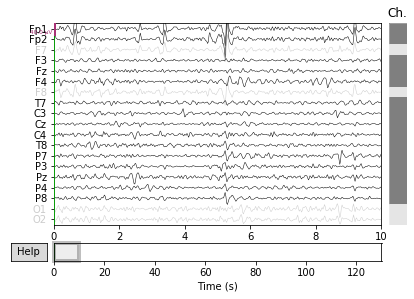

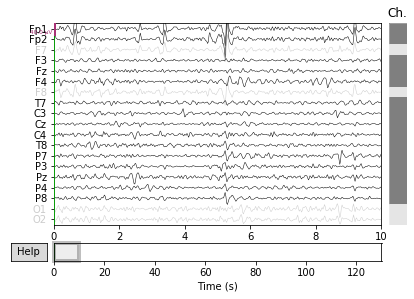

In [156]:
fin_data.plot()

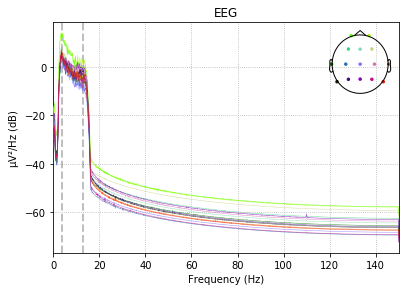

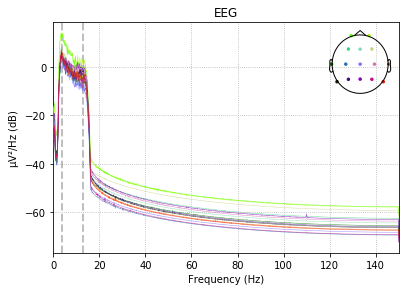

In [157]:
fin_data.plot_psd()

In [158]:
p1_lev1_no = fin_data.get_data()